## Project : Econometry
***
**PARIS SACLAY UNIVRSITY**  
**Author** : ELKADDOURI MEHDI
***
### Summary
Within the framework of this project, we will do a full statistic study of our data and we'll use the three following model to predict the data:  
1. GARCH
2. SARIMAX(3,1,0,2,2,1,7)
3. SARIMAX(1,1,0,2,2,1,7)
4. ARIMA

***


### Garch model
$y_{t}$ follows a model GARCH $(p, q)$ if: 
<center>
 *  $\epsilon_{t}=\sigma_{t} z_{t}, z_{t} \sim +  N(0,1)$ for all $t$ 
    
    
 * $\sigma_{t}^{2}=\omega+\alpha_{1} \epsilon^{2} t-1+\ldots+\alpha_{p} \epsilon^{2} t-p+\beta_{1} \sigma^{2} t-1+\ldots+\beta_{q} \sigma^{2} t-q $

where $\omega>0$ et $0 \leq \alpha_{i}, i=1, \ldots, p, 0 \leq \beta_{j}, j=1, \ldots, q$ and   $\sum_{i=1}^{p}  \alpha_{i}+\sum_{j=1}^{q} \beta_{j}<1$
The last equation is for stationnarity $\epsilon_{t}$
    
***
 

***Import the data :***

In [1]:
import pandas as pd
from Econometrie import my_data,models
import matplotlib.pyplot as plt

In [2]:
"""
 the given data we should skip  two  rows
 we should select  only the two columbs [1,2] because the first column is None
 I made the time column as an index to start manipulating my Time_series
"""
data=pd.read_excel("Donnees_ECO_Nov2020.xlsx",skiprows=2,na_filter=True,index_col=0,usecols=[1,2])

***I give 90 % to my training data and 10 % to the test data***

Pycharm invites me to multiply my_data by 100 for a better prevision

In [3]:

My_data=models(data*100,0.9)

### Statistical study  of my_data

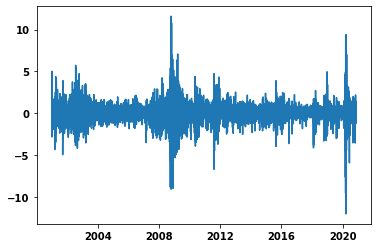

In [4]:
My_data.plot_my_data()

As we can see both the 2008 financial crisis and Corona virus crisis have cleary affect the S&P 500 variation.  
Our data is stationnary but let's confirm it using the ***Augmented ducky-fuller test***

In [5]:
My_data.adf_test()

(0.01, False)

 ###### As we have the :  
<center>
        $ p_{value} = 0.01 < \alpha $ </center> 
        no differencial is needed
        

The ***(ACF)***  makes it possible to find the perfect order moving average.  
The ***(PACF)*** play the same role as ***ACF*** to find the perfect order autoregressive

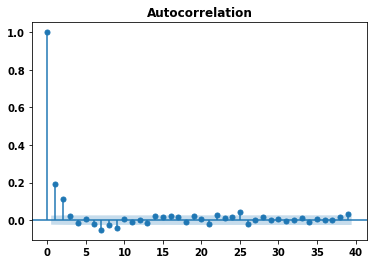

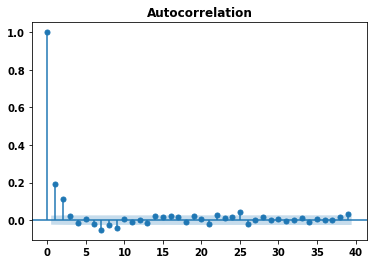

In [6]:
My_data.plot_acf()

***the graph shows that q=2***

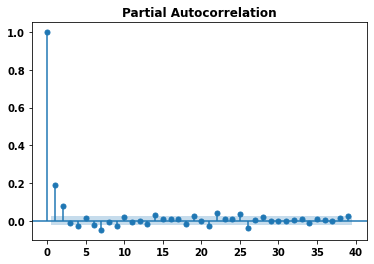

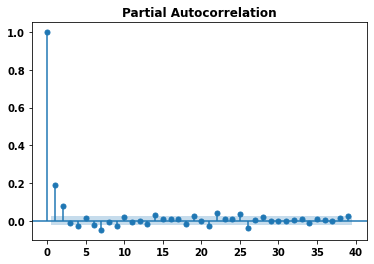

In [7]:
My_data.plot_pacf()

***we also have p = 2***

***The standard deviation of s&P 500***

In [8]:
My_data.std_data()

S&P500    1.198865
dtype: float64

In [9]:
garch_forecast=My_data.model_forcast(2,2)

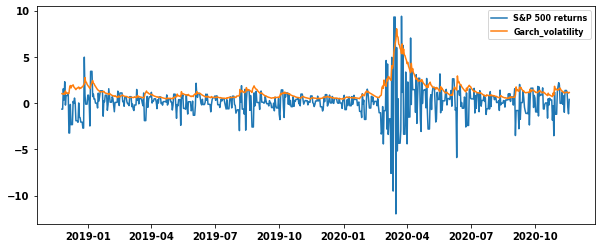

In [10]:
plt.figure(figsize=(10,4))
plt.plot(My_data.my_data[My_data.length_train():])
plt.plot(garch_forecast)
plt.legend(['S&P 500 returns','Garch_volatility'],fontsize=8)
plt.show()

***As seen above , when the variation of returns get bigger , our model clearly predicted the Coronavirus Crisis which means that Garch (2,2) is working perfectly on our Data***

## SARIMAX

The ***ARIMA*** and ***SARIMA*** processes are processes random non-stationary which present "tendencies random "and / or" random seasonal variations (no deterministic) "

***SARIMA models (S for Seasonal) make it possible to make account for seasonal variations in the series considered, these
variations which may themselves be random.*** For sarimax it's just like add

In [11]:
sarimax_forecast=My_data.model_sarimax(3,1,0,2,2,1,7)

C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


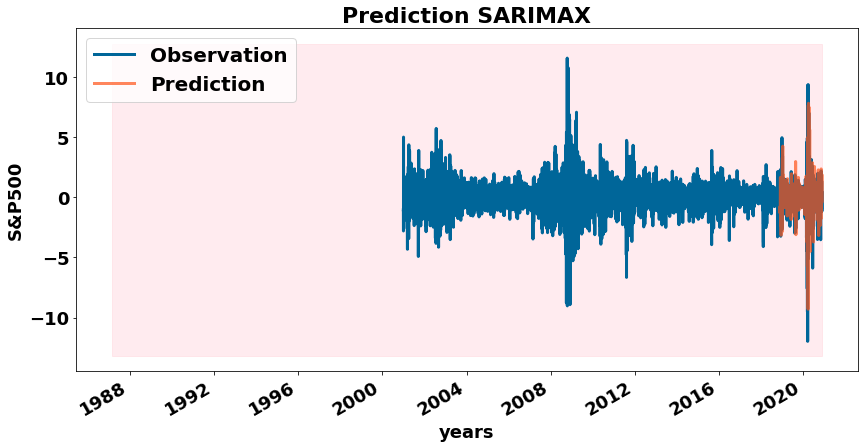

In [12]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax.plot(My_data.my_data[0:], color='#006699', linewidth=3, label='Observation');
sarimax_forecast.predicted_mean.plot(ax=ax, linewidth=3, linestyle='-', label='Prediction', alpha=.7, color='#ff5318',
                                 fontsize=18);
ax.fill_betweenx(ax.get_ylim(), 6264, My_data.my_data.index[-1], alpha=.3, zorder=-1, color='pink');
ax.set_xlabel('years', fontsize=18)
ax.set_ylabel('S&P500', fontsize=18)
plt.legend(loc='upper left', prop={'size': 20})
plt.title('Prediction SARIMAX', fontsize=22, fontweight="bold")
plt.show()

***The model Sarimax(3,1,0,2,2,1,7) has perfectly predicted S&P 500 variation***

In [13]:
sarimax_forecast_1=My_data.model_sarimax(1,1,0,2,2,1,7)

C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


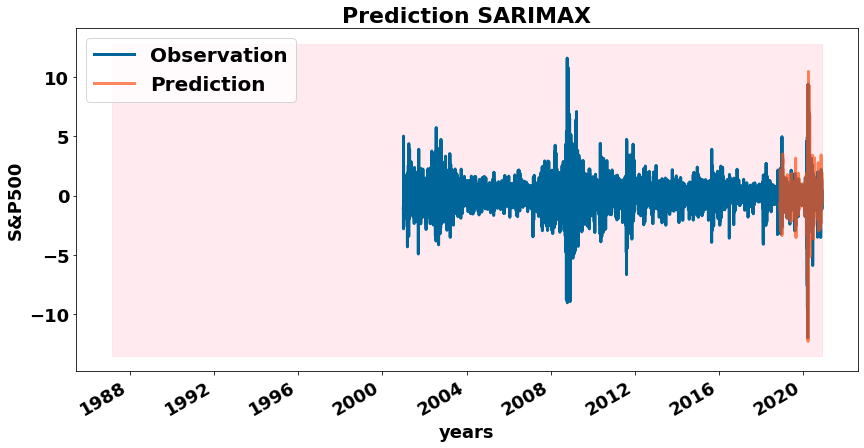

In [14]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax.plot(My_data.my_data[0:], color='#006699', linewidth=3, label='Observation');
sarimax_forecast_1.predicted_mean.plot(ax=ax, linewidth=3, linestyle='-', label='Prediction', alpha=.7, color='#ff5318',
                                 fontsize=18);
ax.fill_betweenx(ax.get_ylim(), 6264, My_data.my_data.index[-1], alpha=.3, zorder=-1, color='pink');
ax.set_xlabel('years', fontsize=18)
ax.set_ylabel('S&P500', fontsize=18)
plt.legend(loc='upper left', prop={'size': 20})
plt.title('Prediction SARIMAX', fontsize=22, fontweight="bold")
plt.show()

***The SARIMAX(1,1,0,2,2,1,7) Model predicted S&P 500 perfectly , much more better than SARIMAX(3,1,0,2,2,1,7)***

## ARIMA MODEL

### arima_auto
***this function gives the perfect parameters to apply for ARIMA MODEL****

In [15]:
My_data.arima_auto()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20028.927, Time=3.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20295.851, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20057.605, Time=0.66 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20095.812, Time=1.57 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20295.452, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=20020.287, Time=4.28 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=20018.976, Time=1.25 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=20019.750, Time=1.68 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=20014.286, Time=11.45 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=20016.966, Time=13.43 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=20012.131, Time=12.24 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20018.344, Time=7.30 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=29.04 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=20002.419, Time=27.56 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=20020.599, Time=5.85 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=20013.217, Time=30.48 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=20018.461, Time=6.55 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=20016.579, Time=8.15 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=20003.895, Time=10.17 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=19996.232, Time=3.40 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=20019.581, Time=0.74 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=20011.101, Time=1.52 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(4,0,3)(0,0,0)[0]             : AIC=20012.346, Time=3.13 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=20017.568, Time=0.73 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=20017.324, Time=0.76 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=20015.674, Time=1.69 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=3.50 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=20000.399, Time=4.53 sec

Best model:  ARIMA(3,0,3)(0,0,0)[0]          
Total fit time: 195.108 seconds


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(order=(3, 0, 3), scoring_args={}, with_intercept=False)

***ARIMA(order=(3, 0, 3)*** is the perfect model to predict  S&P 500

In [18]:
My_data.arima_auto().summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20028.927, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20295.851, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20057.605, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20095.812, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20295.452, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=20020.287, Time=1.32 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=20018.976, Time=0.38 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=20019.750, Time=0.55 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=20014.286, Time=3.82 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=20016.966, Time=3.87 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=20012.131, Time=4.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20018.344, Time=2.26 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.68 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=20002.419, Time=8.40 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=20020.599, Time=1.99 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=20013.217, Time=7.47 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=20018.461, Time=2.19 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=20016.579, Time=3.58 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=20003.895, Time=9.93 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=19996.232, Time=3.46 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=20019.581, Time=0.76 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=20011.101, Time=1.45 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(4,0,3)(0,0,0)[0]             : AIC=20012.346, Time=3.02 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=20017.568, Time=0.73 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=20017.324, Time=0.77 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=20015.674, Time=1.72 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=3.71 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=20000.399, Time=4.44 sec

Best model:  ARIMA(3,0,3)(0,0,0)[0]          
Total fit time: 80.421 seconds


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6537
Model:               SARIMAX(3, 0, 3)   Log Likelihood               -9991.116
Date:                Mon, 01 Feb 2021   AIC                          19996.232
Time:                        19:22:56   BIC                          20043.729
Sample:                             0   HQIC                         20012.655
                               - 6537                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7967      0.026    -30.076      0.000      -0.849      -0.745
ar.L2         -0.3956      0.032    -12.175      0.000      -0.459      -0.332
ar.L3          0.4508      0.026     17.221      0.000       0.399       0.502
ma.L1          0.9807      0.028     35.355      0.000       0.926       1.035
ma.L2          0.6464      0.034     18.973      0.000       0.580       0.713
ma.L3         -0.2544      0.028     -9.188      0.000      -0.309      -0.200
sigma2         1.2383      0.010    125.743      0.000       1.219       1.258
===================================================================================
Ljung-Box (Q):                       83.40   Jarque-Bera (JB):             28318.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
prediction_arima=My_data.model_arima()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20028.927, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20295.851, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20057.605, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20095.812, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20295.452, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=20020.287, Time=1.43 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=20018.976, Time=0.41 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=20019.750, Time=0.58 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=20014.286, Time=3.90 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=20016.966, Time=4.76 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=20012.131, Time=5.29 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20018.344, Time=2.58 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.60 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=20002.419, Time=9.08 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=20020.599, Time=2.03 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=20013.217, Time=7.73 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=20018.461, Time=2.13 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=20016.579, Time=3.76 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=20003.895, Time=10.72 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=19996.232, Time=3.84 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=20019.581, Time=0.84 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=20011.101, Time=1.60 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(4,0,3)(0,0,0)[0]             : AIC=20012.346, Time=3.42 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=20017.568, Time=0.82 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=20017.324, Time=0.85 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=20015.674, Time=1.93 sec


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=4.21 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=20000.399, Time=5.25 sec

Best model:  ARIMA(3,0,3)(0,0,0)[0]          
Total fit time: 88.659 seconds


C:\Users\ELKADDOURI MEHDI\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


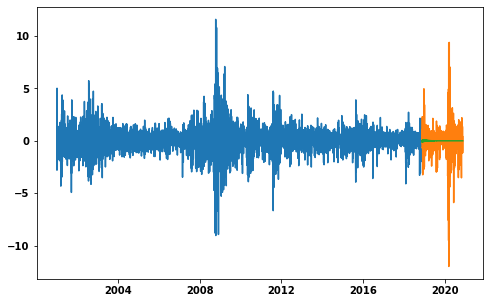

In [11]:
plt.figure(figsize=(8,5))
plt.plot(My_data.train_data(),label="Training")
plt.plot(My_data.test_data(),label="Test")
plt.plot(prediction_arima,label="Predicted")
plt.show()

THE ARIMA MODEL FAILS while predicting the S&P 500 testing data .
The model isn't working

## Conclusion

We have tried 4 Models to predict S&P 500  dat Among them 3 worked : 
1. GARCH
2. SARIMAX(3,1,0,2,2,1,7)
3. SARIMAX(1,1,0,2,2,1,7)

and one failed 

4. ARIMA